In [1]:
using DifferentialEquations, CairoMakie
using Compactons

In [14]:
L = 10
N = 2000
E₀ = 5
;

In [15]:
tmax = 5.0
;

In [16]:
dx = L/N
x = 0.0:dx:L

tsave = 0.0:1e-2:tmax
tspan = (tsave[1], tsave[end])

φ₀ = zero(x)
∂ₜφ₀ = zero(x)

Δ = (x[end] - x[begin]) / 100
λ = √(24 / 100 * E₀ / Δ^3)

for x₀ ∈ x[begin]:Δ:x[end]
    α = rand([0, 0.5])
    ∂ₜφ₀ += λ * ∂ₜoscillon.(α, x .- x₀, l=Δ)
end

In [17]:
energy = SavedValues(Float64, Float64)
cbenergy = SavingCallback(getenergy, energy; saveat=tsave)

hamiltonian = SavedValues(Float64, Vector{Float64})
cbhamiltonian = SavingCallback(gethamiltonian, hamiltonian; saveat=tsave)

callback = CallbackSet(cbenergy, cbhamiltonian)

prob = SecondOrderODEProblem(fieldeq!, ∂ₜφ₀, φ₀, tspan, (signumgordon, N, dx))
@time sol = solve(prob, RK4(); adaptive=false, dt=dx / 10, saveat=tsave, save_idxs=N+1:10:2N, callback=callback)

  0.684448 seconds (7.88 M allocations: 134.597 MiB, 12.87% gc time, 0.64% compilation time)


retcode: Success
Interpolation: 1st order linear
t: 501-element Vector{Float64}:
 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1
 0.11
 0.12
 ⋮
 4.89
 4.9
 4.91
 4.92
 4.93
 4.94
 4.95
 4.96
 4.97
 4.98
 4.99
 5.0
u: 501-element Vector{Vector{Float64}}:
 [-1.2499257461493164e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [-1.2499257461493164e-14, -0.015220402033057927, -0.0020010395798580436, -0.015220402033057983, -0.002001039579858048, -0.015220402033057983, -0.002001039579858051, -0.015220402033057983, -0.00200103957985804, -0.015220402033057977  …  -0.0020010395798581593, -0.01522040203305798, -0.002001039579858089, -0.015220402033058017, -0.0020010395798580596, -0.01522040203305805, -0.002001039579857872, -0.015220402033057774, -0.0020010395798582582, -0.015220402033057884]
 [-1.2499257461493164e-14, -0.0271364714229603, -0.0071051720303739845, -0.027136471496818693, -0.007105172030373992, -0.0271364714968186

In [11]:
φ = reduce(hcat, sol.u)
H = reduce(hcat, hamiltonian.saveval)

xsave = x[1:10:N]

0.0:0.05:9.95

## Campo

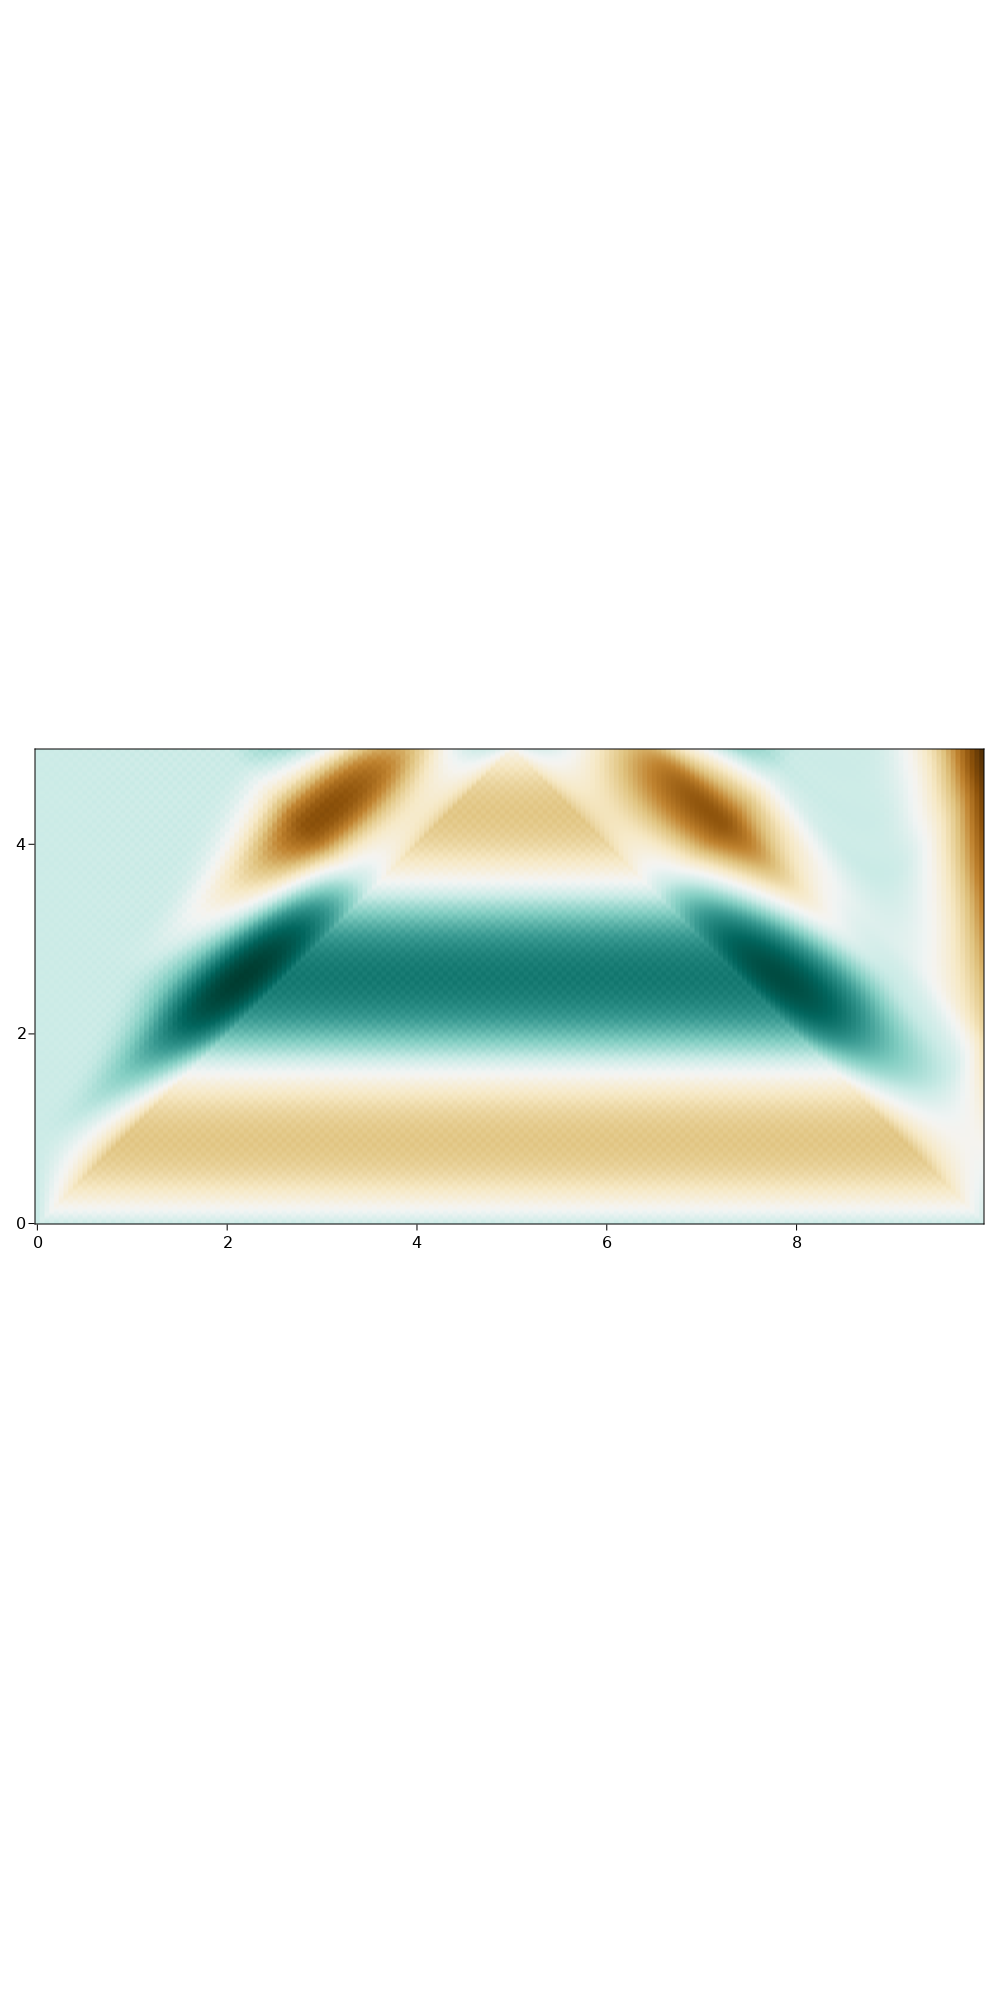

In [18]:
fig = Figure(resolution=(1000, 2000))
ax, hm = heatmap(fig[1, 1], xsave, tsave, φ, colormap=:BrBG_11)
ax.aspect = DataAspect()
fig

### Campo no instante final

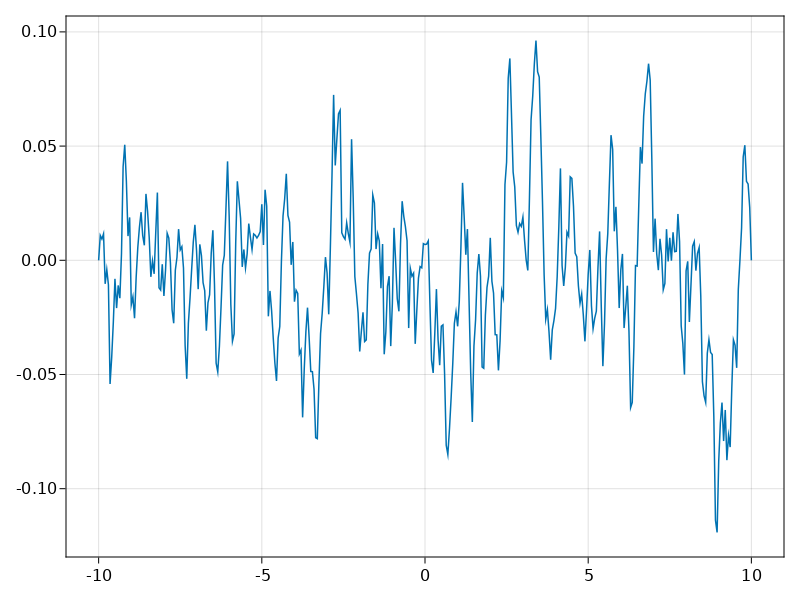

In [7]:
lines(xsave, φ[:, end])

## Densidade de energia

In [8]:
fig = Figure(resolution=(1000, 2000))
ax, hm = heatmap(fig[1, 1], xsave, tsave, H, colormap=:magma)
ax.aspect = DataAspect()
fig

## Energia como função do tempo

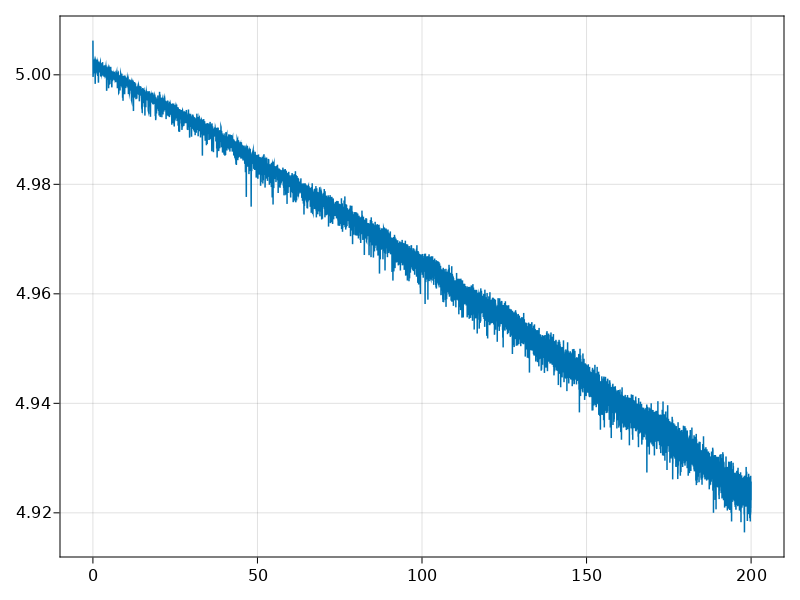

In [9]:
lines(tsave, energy.saveval)

In [10]:
1 - energy.saveval[end] / energy.saveval[begin]

0.016085451832262176